In [2]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings 
warnings.filterwarnings("ignore")

# 1. Data Collection through website

In [4]:
url="https://ackodrive.com/?utm_source=google&utm_medium=cpc&utm_campaign=Acko_Drive|Search|Brand|AllCities|EN|Brand|Exact&utm_adgroup=AckoDrive&utm_term=ackodrive&utm_content=593760514946&utm_Sitelink=&utm_device=c&utm_location=9062135&gclid=CjwKCAjwp6CkBhB_EiwAlQVyxQeRN7PmhF9ToOOkqkTXBYiuovj5mDRXo_kTbt8tfg2-2uLQ84iinBoC9OMQAvD_BwE"

In [5]:
page = requests.get(url)
page

<Response [200]>

In [86]:
# page.text

In [87]:
# soup = BeautifulSoup(page.text)
# soup

In [ ]:
city=["Delhi","hyderabad","mumbai","chennai","gurgaon","pune","noida","ghaziabad","bangalore","faridabad"]
brand=["tata","hyundai","kia","mahindra","Maruti Suzuki","Renault","Skoda","Toyota","Honda","MG","Volkswagen"]
prices = []
Colors=[]
company=[]
model= []
body_type=[]
location=[]

for x in city:
    for j in brand:
        url=f"https://ackodrive.com/collection/{j}-cars/{x}/"
        print(url)
        
        page = requests.get(url)
        soup = BeautifulSoup(page.text)
        # company
        c = soup.find_all("span",class_="styles__Make-sc-e6e7c3d5-5 frtoem")

        
        for i in c:
            company.append(i.text)
            location.append(x)
            

        # model
        m = soup.find_all("span",class_="styles__ModelName-sc-e6e7c3d5-6 kVtFVY")

        
        for i in m:
            model.append(i.text)

        # body type
        b = soup.find_all("p",class_="styles__ParaWithoutMargins-sc-e6e7c3d5-33 eFucbo")

        
        for i in b:
            body_type.append(i.text)

        body = body_type[0::6]

        # seater
        seat = body_type[1::6]

        # variants
        variants = body_type[2::6]

        # fuel_type
        fuel_type = body_type[3::6]

        # transmission
        transmission = body_type[4::6]
        
        

        # colors
        for i in soup.find_all("div",class_="styles__VariantDetails-sc-e6e7c3d5-11 ListingCarDesktop__DesktopVariantDetails-sc-5b307ee6-10 kmhywP"):
            #print(i.text)
            regex=re.findall("(\d+)\scolors",i.text)
            if regex:
                Colors.append(regex[0])
            else:
                Colors.append(np.nan)
            

        # prices
        p = soup.find_all("div",class_="styles__Price-sc-e6e7c3d5-18 iKRtvx")
        
        
        for i in p:
            prices.append(i.text)
            
d = {"COMPANY" : company,
     "MODEL" : model,
     "BODY_TYPE" : body,
     "SEAT_CAPACITY" : seat,
     "VARIANTS" : variants,
     "FUEL_TYPE" : fuel_type,
     "TRANSMISSION" : transmission,
     "COLORS" : Colors,
     "PRICE" : prices,
     "Location" : location
     
    }


In [19]:
DataFrame  = pd.DataFrame(d)
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE,Location
0,Maruti Suzuki,S-Presso,SUV,5 Seater,1/7 variants,Petrol,Manual,6,₹6.11 L,Mumbai
1,Hyundai,i20 N Line,Hatchback,5 Seater,1/3 variants,Petrol,Manual,9,₹12.06 L,Mumbai
2,Hyundai,Venue,SUV,5 Seater,1/11 variants,Petrol,Manual,6 colors,₹8.99 L,Chennai
3,Maruti Suzuki,Fronx,SUV,5 Seater,1/10 variants,Petrol,Manual,7 colors,₹8.47 L,gurgaon
4,Tata,Punch,SUV,5 Seater,1/22 variants,Petrol,Manual,2,₹7.18 L,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5 Seater,1/4 variants,Petrol,Manual,5,₹6.37 L,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5 Seater,1/11 variants,Petrol,Manual,2 colors,₹6.62 L,pune
494,Tata,Nexon EV Prime,SUV,5 Seater,1/5 variants,Electric,Automatic,2 colors,₹15.36 L,Chennai
495,Tata,Nexon,SUV,5 Seater,1/50 variants,Petrol,Manual,3 colors,₹9.31 L,hyderabad


# 2. Data Cleaning
removing the unwanted data by regex

In [20]:
# extracting only 'seat numbers' on 'SEAT_CAPACITY' by using regex...
DataFrame["SEAT_CAPACITY"].str.extract(r"(\d+)")  

,0
0,5
1,5
2,5
3,5
4,5
...,...
492,5
493,5
494,5
495,5


In [21]:
DataFrame["SEAT_CAPACITY"] = DataFrame["SEAT_CAPACITY"].str.extract(r"(\d+)")

In [22]:
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE,Location
0,Maruti Suzuki,S-Presso,SUV,5,1/7 variants,Petrol,Manual,6,₹6.11 L,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,1/3 variants,Petrol,Manual,9,₹12.06 L,Mumbai
2,Hyundai,Venue,SUV,5,1/11 variants,Petrol,Manual,6 colors,₹8.99 L,Chennai
3,Maruti Suzuki,Fronx,SUV,5,1/10 variants,Petrol,Manual,7 colors,₹8.47 L,gurgaon
4,Tata,Punch,SUV,5,1/22 variants,Petrol,Manual,2,₹7.18 L,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,1/4 variants,Petrol,Manual,5,₹6.37 L,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,1/11 variants,Petrol,Manual,2 colors,₹6.62 L,pune
494,Tata,Nexon EV Prime,SUV,5,1/5 variants,Electric,Automatic,2 colors,₹15.36 L,Chennai
495,Tata,Nexon,SUV,5,1/50 variants,Petrol,Manual,3 colors,₹9.31 L,hyderabad


In [23]:
# extracting only 'colors count' on 'colors' by using regex...
DataFrame["COLORS"].str.extract(r"(\d+)")

,0
0,6
1,9
2,6
3,7
4,2
...,...
492,5
493,2
494,2
495,3


In [25]:
DataFrame["COLORS"] = DataFrame["COLORS"].str.extract(r"(\d+)")
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE,Location
0,Maruti Suzuki,S-Presso,SUV,5,1/7 variants,Petrol,Manual,6,₹6.11 L,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,1/3 variants,Petrol,Manual,9,₹12.06 L,Mumbai
2,Hyundai,Venue,SUV,5,1/11 variants,Petrol,Manual,6,₹8.99 L,Chennai
3,Maruti Suzuki,Fronx,SUV,5,1/10 variants,Petrol,Manual,7,₹8.47 L,gurgaon
4,Tata,Punch,SUV,5,1/22 variants,Petrol,Manual,2,₹7.18 L,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,1/4 variants,Petrol,Manual,5,₹6.37 L,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,1/11 variants,Petrol,Manual,2,₹6.62 L,pune
494,Tata,Nexon EV Prime,SUV,5,1/5 variants,Electric,Automatic,2,₹15.36 L,Chennai
495,Tata,Nexon,SUV,5,1/50 variants,Petrol,Manual,3,₹9.31 L,hyderabad


In [26]:
# extracting only 'variants count' on 'variants' by using regex...
DataFrame["VARIANTS"].replace(r"\d+/(\d+)\svariants","r\1",regex=True)

0      r
1      r
2      r
3      r
4      r
       ..
492    r
493    r
494    r
495    r
496    r
Name: VARIANTS, Length: 497, dtype: object

In [27]:
DataFrame["VARIANTS"] = DataFrame["VARIANTS"].replace(r"\d+/(\d+)\svariants",r"\1",regex=True)
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE,Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,₹6.11 L,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,₹12.06 L,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,₹8.99 L,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,₹8.47 L,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,₹7.18 L,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,₹6.37 L,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,₹6.62 L,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,₹15.36 L,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,₹9.31 L,hyderabad


In [29]:
# changing the price column name..
DataFrame.rename(columns={"PRICE" : "PRICE(In lakhs)"}, inplace = True)
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,₹6.11 L,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,₹12.06 L,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,₹8.99 L,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,₹8.47 L,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,₹7.18 L,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,₹6.37 L,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,₹6.62 L,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,₹15.36 L,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,₹9.31 L,hyderabad


In [30]:
# extracting only "PRICES" on  by using regex...
DataFrame['PRICE(In lakhs)'].replace("[^0-9\.0-9]","",regex=True)

0       6.11
1      12.06
2       8.99
3       8.47
4       7.18
       ...  
492     6.37
493     6.62
494    15.36
495     9.31
496     7.79
Name: PRICE(In lakhs), Length: 497, dtype: object

In [31]:
DataFrame['PRICE(In lakhs)'] = DataFrame['PRICE(In lakhs)'].replace("[^0-9\.0-9]","",regex=True)
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,6.11,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,12.06,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,8.99,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,8.47,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,7.18,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,6.37,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,6.62,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,15.36,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,9.31,hyderabad


In [32]:
DataFrame.isna().sum()

COMPANY            0
MODEL              0
BODY_TYPE          0
SEAT_CAPACITY      0
VARIANTS           0
FUEL_TYPE          0
TRANSMISSION       0
COLORS             3
PRICE(In lakhs)    0
Location           0
dtype: int64

In [35]:
# dropping the nan values..
DataFrame.dropna(inplace=True) 
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,6.11,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,12.06,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,8.99,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,8.47,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,7.18,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,6.37,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,6.62,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,15.36,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,9.31,hyderabad


In [36]:
DataFrame.isna().sum().sum()   # no nan values

0

In [37]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 496
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COMPANY          494 non-null    object
 1   MODEL            494 non-null    object
 2   BODY_TYPE        494 non-null    object
 3   SEAT_CAPACITY    494 non-null    object
 4   VARIANTS         494 non-null    object
 5   FUEL_TYPE        494 non-null    object
 6   TRANSMISSION     494 non-null    object
 7   COLORS           494 non-null    object
 8   PRICE(In lakhs)  494 non-null    object
 9   Location         494 non-null    object
dtypes: object(10)
memory usage: 42.5+ KB


# Type conversion

In [38]:
DataFrame["SEAT_CAPACITY"] = DataFrame["SEAT_CAPACITY"].astype("int")

In [40]:
## DataFrame["VARIANTS"] = DataFrame["VARIANTS"].astype("int") # one record has categorical value, that's it wont work astype

In [41]:
DataFrame.drop(355,inplace=True)

In [42]:
DataFrame["VARIANTS"] = DataFrame["VARIANTS"].astype("int") # now astype will work after dropping categorical record..

In [43]:
DataFrame["COLORS"] = DataFrame["COLORS"].astype("int")

In [44]:
DataFrame["PRICE(In lakhs)"] = DataFrame["PRICE(In lakhs)"].astype("float")

In [45]:
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,6.11,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,12.06,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,8.99,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,8.47,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,7.18,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,6.37,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,6.62,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,15.36,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,9.31,hyderabad


In [46]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 496
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMPANY          493 non-null    object 
 1   MODEL            493 non-null    object 
 2   BODY_TYPE        493 non-null    object 
 3   SEAT_CAPACITY    493 non-null    int32  
 4   VARIANTS         493 non-null    int32  
 5   FUEL_TYPE        493 non-null    object 
 6   TRANSMISSION     493 non-null    object 
 7   COLORS           493 non-null    int32  
 8   PRICE(In lakhs)  493 non-null    float64
 9   Location         493 non-null    object 
dtypes: float64(1), int32(3), object(6)
memory usage: 36.6+ KB


# 3. Data Analysis

. Uni Variant
. Bivariant
. Multivariant

### Uni variant Analysis

In [47]:
DataFrame["COMPANY"].unique()

array(['Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Honda', 'Toyota',
       'Kia', 'Renault', 'Skoda', 'MG', 'Volkswagen'], dtype=object)

In [48]:
DataFrame["COMPANY"].nunique()

11

In [49]:
DataFrame["COMPANY"].value_counts()

Maruti Suzuki    149
Hyundai          109
Tata              97
Mahindra          37
Renault           24
Skoda             20
Toyota            18
Honda             16
Kia               15
MG                 6
Volkswagen         2
Name: COMPANY, dtype: int64

In [50]:
DataFrame["PRICE(In lakhs)"].max()

49.43

In [51]:
DataFrame["PRICE(In lakhs)"].min()

5.02

In [52]:
DataFrame["PRICE(In lakhs)"].mean()

12.652454361054778

In [53]:
DataFrame.describe()

,SEAT_CAPACITY,VARIANTS,COLORS,PRICE(In lakhs)
count,493.000000,493.000000,493.000000,493.000000
mean,5.326572,10.468560,5.247465,12.652454
std,0.791754,8.058067,1.980499,7.179165
min,5.000000,2.000000,1.000000,5.020000
25%,5.000000,6.000000,4.000000,7.690000
50%,5.000000,9.000000,6.000000,10.440000
75%,5.000000,12.000000,6.000000,15.250000
max,9.000000,50.000000,14.000000,49.430000


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

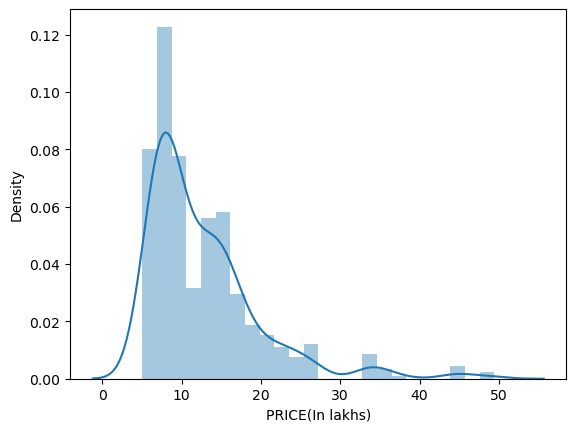

In [55]:
# distplot is used to find the distribution..
sns.distplot(DataFrame["PRICE(In lakhs)"])     
plt.show()

In [56]:
DataFrame["PRICE(In lakhs)"].skew() 

2.0807822339072928

<AxesSubplot:xlabel='PRICE(In lakhs)'>

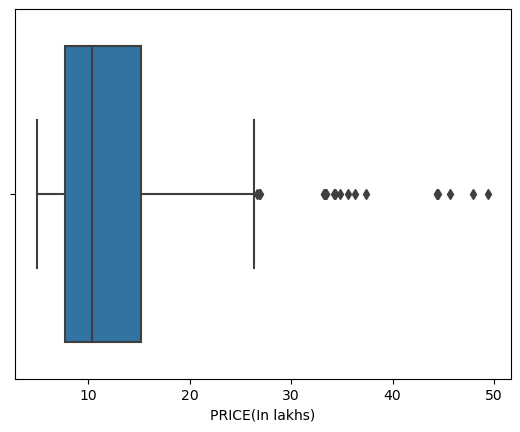

In [57]:
# boxplot is used to find the outliers..
sns.boxplot(DataFrame["PRICE(In lakhs)"])

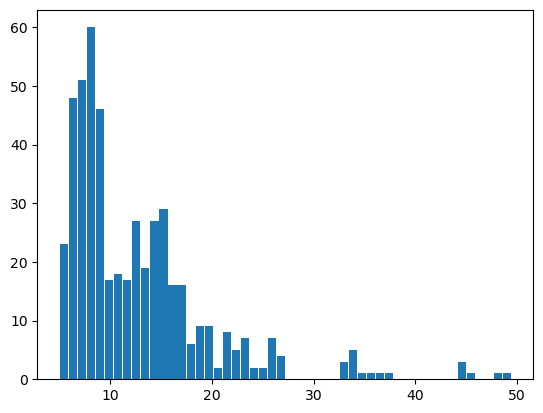

In [58]:
plt.hist(DataFrame["PRICE(In lakhs)"], bins = 50, rwidth =0.90)
plt.show()

IQR method

In [59]:
# we use IQR method, because it has no lower limit outliers...

# IQR==>Q3 - Q1
# lower limit == Q1 - (1.5 * IQR)
# upper limit == Q3 + (1.75 * IQR)

In [60]:
DataFrame.describe()

,SEAT_CAPACITY,VARIANTS,COLORS,PRICE(In lakhs)
count,493.000000,493.000000,493.000000,493.000000
mean,5.326572,10.468560,5.247465,12.652454
std,0.791754,8.058067,1.980499,7.179165
min,5.000000,2.000000,1.000000,5.020000
25%,5.000000,6.000000,4.000000,7.690000
50%,5.000000,9.000000,6.000000,10.440000
75%,5.000000,12.000000,6.000000,15.250000
max,9.000000,50.000000,14.000000,49.430000


In [61]:
q1 = DataFrame["PRICE(In lakhs)"].quantile(0.25)
q1

7.69

In [62]:
q3 = DataFrame["PRICE(In lakhs)"].quantile(0.75)
q3

15.25

In [63]:
iqr = q3 - q1
iqr

7.56

In [64]:
lower = q1 - (1.5 * iqr)    # lower limit
lower

-3.6499999999999995

In [65]:
upper = q3 + (1.5 * iqr)   # upper limit
upper

26.59

Errors below lower limit

In [67]:
DataFrame["PRICE(In lakhs)"]

0       6.11
1      12.06
2       8.99
3       8.47
4       7.18
       ...  
492     6.37
493     6.62
494    15.36
495     9.31
496     7.79
Name: PRICE(In lakhs), Length: 493, dtype: float64

In [68]:
DataFrame[ DataFrame["PRICE(In lakhs)"] < lower ]

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location


Errors above upper limit

In [69]:
DataFrame[["PRICE(In lakhs)"]]

,PRICE(In lakhs)
0,6.11
1,12.06
2,8.99
3,8.47
4,7.18
...,...
492,6.37
493,6.62
494,15.36
495,9.31


In [70]:
DataFrame[ DataFrame["PRICE(In lakhs)"] > upper ]

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
17,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.45,gurgaon
54,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,44.42,ghaziabad
64,MG,Gloster,SUV,6,6,Diesel,Automatic,4,37.39,ghaziabad
99,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.45,faridabad
109,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,44.42,noida
167,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.25,noida
241,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,47.93,hyderabad
244,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,34.30,pune
265,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,45.63,pune
274,MG,ZS EV,SUV,5,3,Electric,Automatic,2,26.88,ghaziabad


In [71]:
DataFrame[ (DataFrame["PRICE(In lakhs)"] < lower) | (DataFrame["PRICE(In lakhs)"] > upper) ]

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
17,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.45,gurgaon
54,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,44.42,ghaziabad
64,MG,Gloster,SUV,6,6,Diesel,Automatic,4,37.39,ghaziabad
99,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.45,faridabad
109,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,44.42,noida
167,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,33.25,noida
241,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,47.93,hyderabad
244,Hyundai,Tucson,SUV,5,5,Petrol,Automatic,5,34.30,pune
265,Skoda,Kodiaq,SUV,7,3,Petrol,Automatic,1,45.63,pune
274,MG,ZS EV,SUV,5,3,Electric,Automatic,2,26.88,ghaziabad


In [72]:
DataFrame[ (DataFrame["PRICE(In lakhs)"] < lower) | (DataFrame["PRICE(In lakhs)"] > upper) ].shape

(21, 10)

In [73]:
DataFrame

,COMPANY,MODEL,BODY_TYPE,SEAT_CAPACITY,VARIANTS,FUEL_TYPE,TRANSMISSION,COLORS,PRICE(In lakhs),Location
0,Maruti Suzuki,S-Presso,SUV,5,7,Petrol,Manual,6,6.11,Mumbai
1,Hyundai,i20 N Line,Hatchback,5,3,Petrol,Manual,9,12.06,Mumbai
2,Hyundai,Venue,SUV,5,11,Petrol,Manual,6,8.99,Chennai
3,Maruti Suzuki,Fronx,SUV,5,10,Petrol,Manual,7,8.47,gurgaon
4,Tata,Punch,SUV,5,22,Petrol,Manual,2,7.18,Delhi
...,...,...,...,...,...,...,...,...,...,...
492,Maruti Suzuki,Eeco,Minivan/Van,5,4,Petrol,Manual,5,6.37,Mumbai
493,Hyundai,Grand i10 Nios,Hatchback,5,11,Petrol,Manual,2,6.62,pune
494,Tata,Nexon EV Prime,SUV,5,5,Electric,Automatic,2,15.36,Chennai
495,Tata,Nexon,SUV,5,50,Petrol,Manual,3,9.31,hyderabad


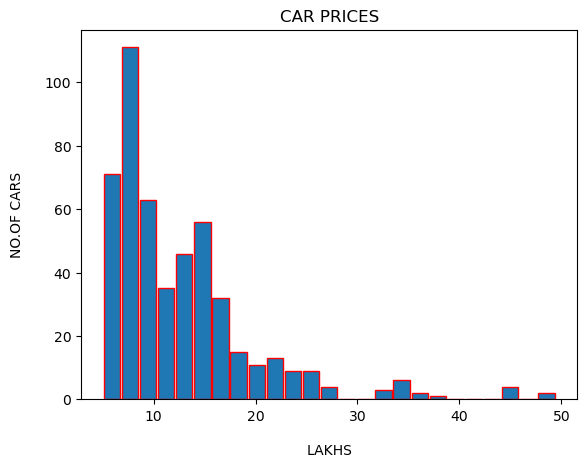

In [74]:
plt.hist(DataFrame["PRICE(In lakhs)"], rwidth=0.9, ec="r", bins=25)
plt.xlabel("LAKHS", fontsize = 10, labelpad = 15)
plt.ylabel("NO.OF CARS" ,fontsize = 10, labelpad = 15)
plt.title("CAR PRICES", fontsize = 12)
plt.show()

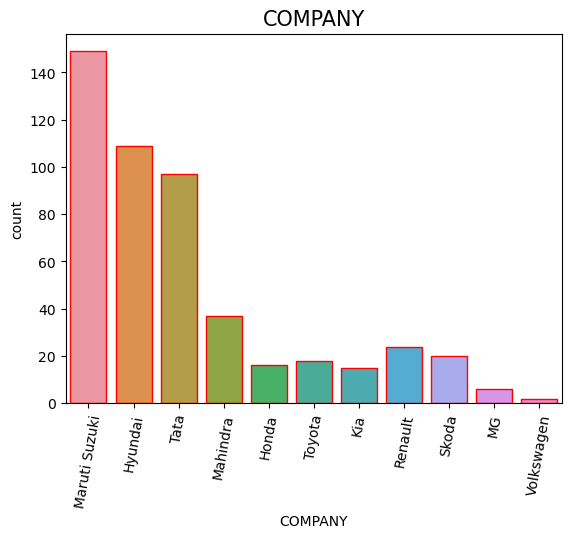

In [75]:
sns.countplot(DataFrame["COMPANY"], ec = "r")
plt.title("COMPANY", fontsize = 15, )
plt.xticks(rotation=80)
plt.show()

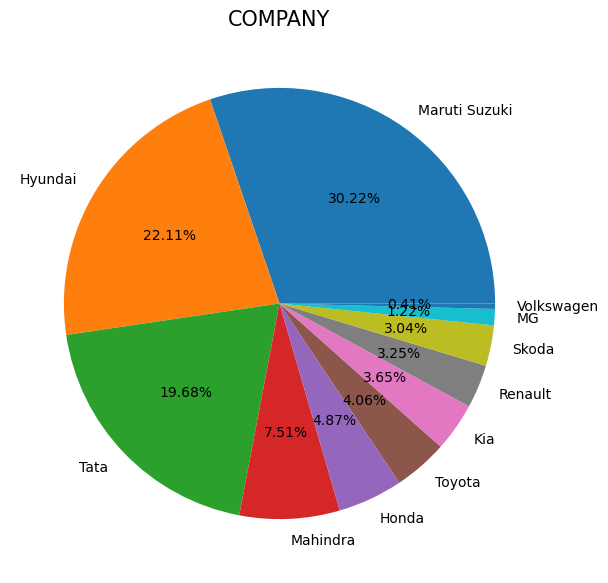

In [76]:
plt.figure(figsize=(13,7))
plt.title("COMPANY", fontsize = 15 )
plt.pie(DataFrame["COMPANY"].value_counts(),labels=DataFrame["COMPANY"].unique(),autopct="%0.02f%%")
plt.show()

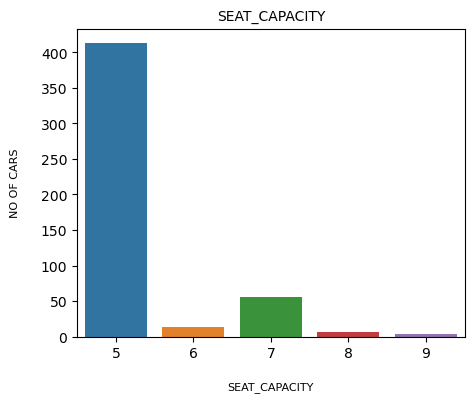

In [77]:
plt.figure(figsize=(5,4))
sns.countplot(DataFrame['SEAT_CAPACITY'])
plt.title("SEAT_CAPACITY", fontsize = 10)
plt.xlabel("SEAT_CAPACITY", fontsize = 8, labelpad = 15)
plt.ylabel("NO OF CARS", fontsize = 8, labelpad = 15)
plt.show()

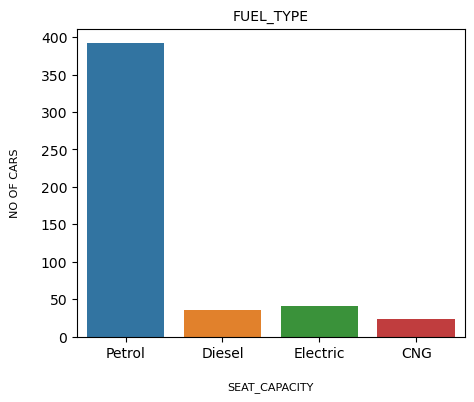

In [78]:
plt.figure(figsize=(5,4))
sns.countplot(DataFrame['FUEL_TYPE'])
plt.title("FUEL_TYPE", fontsize = 10)
plt.xlabel("SEAT_CAPACITY", fontsize = 8, labelpad = 15)
plt.ylabel("NO OF CARS", fontsize = 8, labelpad = 15)
plt.show()

# Bivariant analysis

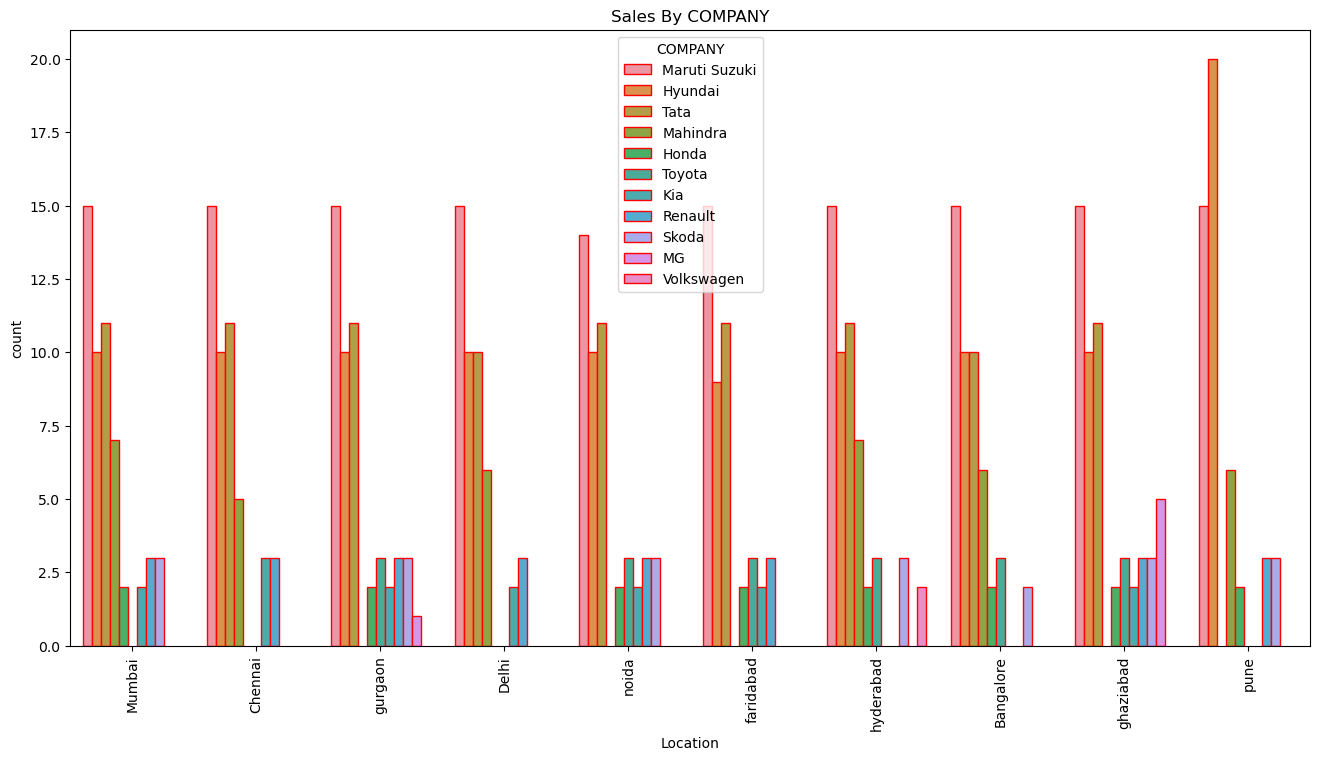

In [79]:
# SALES BY COMPANY
plt.figure(figsize=(16,8))
sns.countplot(x='Location',hue='COMPANY', data=DataFrame,ec="r")
plt.title("Sales By COMPANY")
plt.xticks(rotation=90)
plt.show()

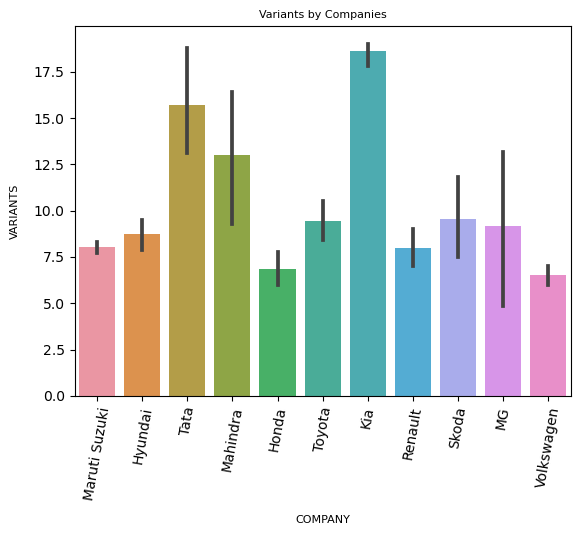

In [80]:
sns.barplot(DataFrame["COMPANY"],DataFrame["VARIANTS"])
plt.xlabel("COMPANY", fontsize = 8, labelpad = 10)
plt.ylabel("VARIANTS", fontsize = 8, labelpad = 10)
plt.title("Variants by Companies", fontsize = 8)
plt.xticks(rotation=80)
plt.show()

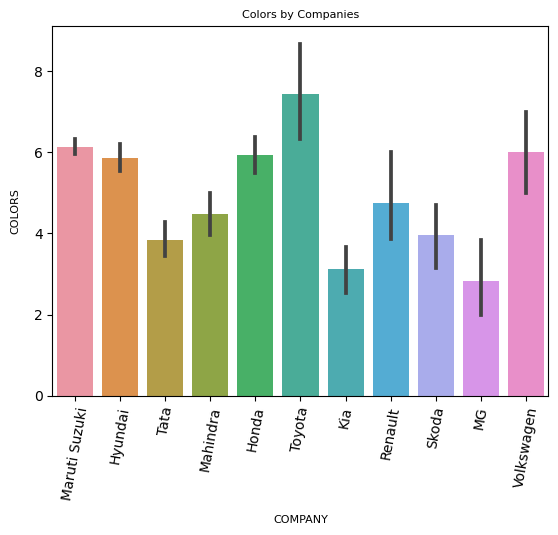

In [81]:
sns.barplot(DataFrame["COMPANY"],DataFrame["COLORS"])
plt.xlabel("COMPANY", fontsize = 8, labelpad = 10)
plt.ylabel("COLORS", fontsize = 8, labelpad = 10)
plt.title("Colors by Companies", fontsize = 8)
plt.xticks(rotation=80)
plt.show()

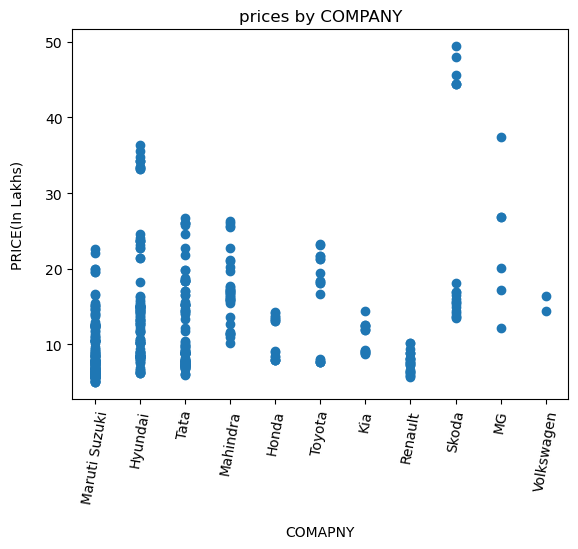

In [82]:
plt.scatter(DataFrame['COMPANY'],DataFrame['PRICE(In lakhs)'])
plt.xlabel("COMAPNY", fontsize = 10, labelpad = 15)
plt.ylabel("PRICE(In Lakhs)" ,fontsize = 10, labelpad = 15)
plt.title("prices by COMPANY", fontsize = 12)
plt.xticks(rotation=80)
plt.show()

# Multivariant Analysis

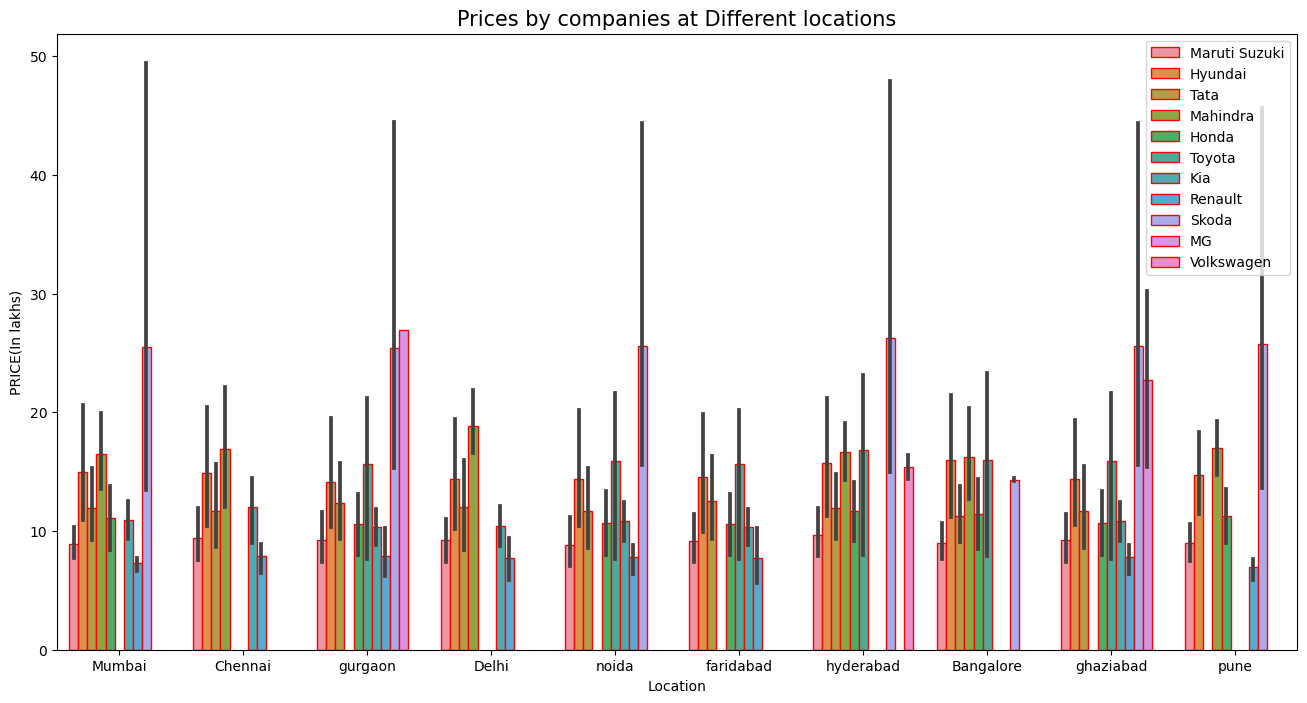

In [83]:
plt.figure(figsize = (16,8))    # need to visualize more using other plot...
sns.barplot(x="Location", y="PRICE(In lakhs)", hue="COMPANY",data=DataFrame, ec='r')
plt.title("Prices by companies at Different locations", fontsize = 15)
plt.legend(loc=1)
plt.show()

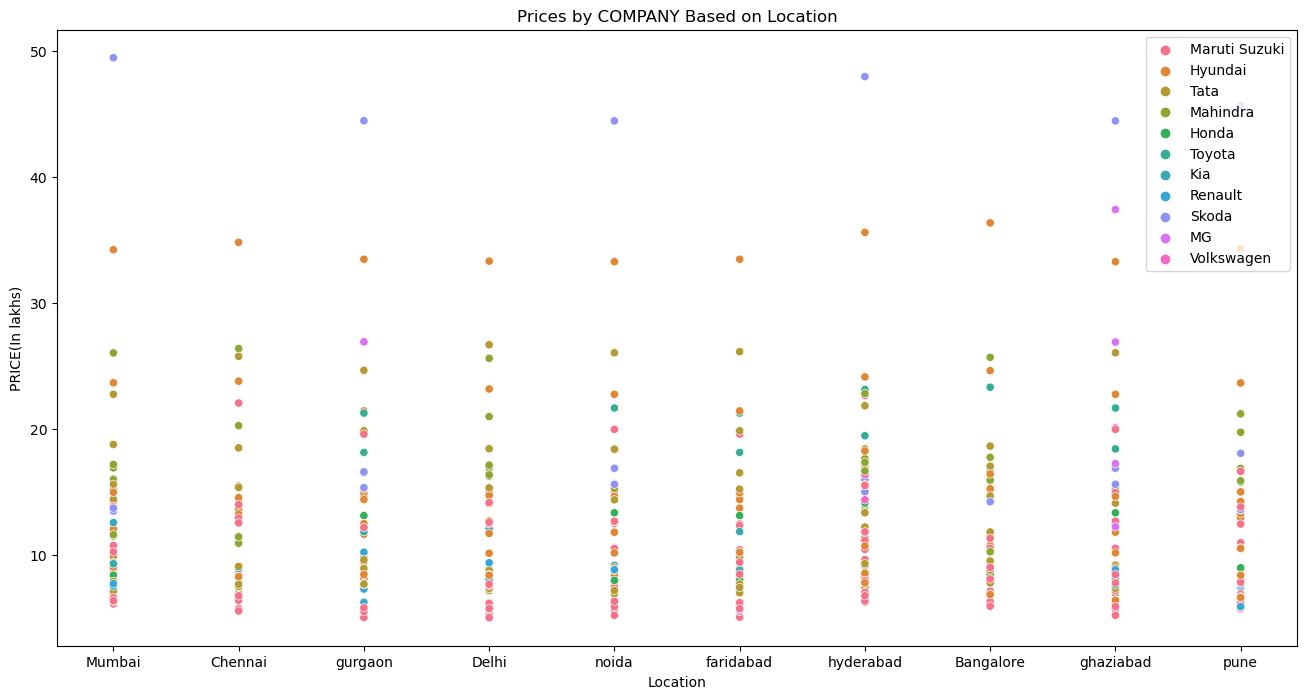

In [84]:
plt.figure(figsize = (16,8))
sns.scatterplot(DataFrame['Location'],DataFrame['PRICE(In lakhs)'],hue=DataFrame['COMPANY'])
plt.title("Prices by COMPANY Based on Location", fontsize = 12)
plt.legend(loc=1)
plt.show()

# Heat Map

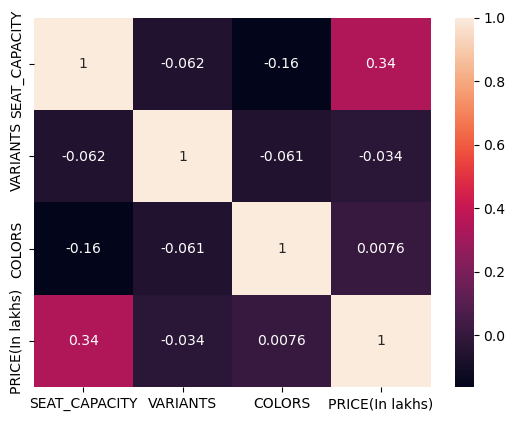

In [85]:
# HEAT MAP
sns.heatmap(DataFrame.corr(), annot = True)
plt.show()